###### Reduced Events Table

__Description__: Reduced excess rainfall is calculated for each event using a user-specified stormwater removal rate and capacity.

__Input__: A JSON file containing the incremental excess rainfall for a suite of events which may have different durations and boundary condition names, and the stormwater removal rate and capacity. 

__Output__: 

- The unreduced incremental excess rainfall for each event as a JSON.

- The incremental reduced excess rainfall and lateral inflow hydrographs for each event as a JSON.

- A metadata file containing the stormwater removal rate, the stormwater capacity, and the seed of the random number generator.

---

## A. Load Libraries, Parameters, and Data:

### Libraries:

In [1]:
import sys
sys.path.append('core')
import hydromet_reduced
from hydromet import*

### Parameters: 

#### Papermill (site specific):

##### Convert all paths to objects:

In [3]:
outputs_dir = pl.Path(outputs_dir)
pluvial_params_dir = pl.Path(pluvial_params_dir)

##### Set the base filestem for reading/writing files:

In [4]:
filestem = '{0}_{1}_{2}'.format(Project_Area, Pluvial_Model, BCN)

### Data:
#### Stormwater removal rate and capacity:

In [5]:
rate, maxcap = get_stormwater_rate_cap(pluvial_params_dir, BCN, rate_column, capacity_column, display_print)

,Pluvial Domain,Shapefile,Curve Number,SW Infrastructure (YES or NO),SW Rate (in/30min),SW Capacity (in),Comments,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,D01,P01_2D_Domain.shp,82.0,YES,0.1083,8.47,SW Rate from NJDOT 2015 Roadway Design Manual,NaN,NaN,NaN,NaN,NaN,NaN


None
SW Rate: 0.1083 in/30min
SW Capacity: 8.47 in/unit area


#### Lateral inflow domains:

In [6]:
lid = get_lateral_inflow_domains(pluvial_params_dir, BCN, display_print)

,Pluvial Domain,Lateral Inflow Domain,Lateral Inflow Area (miles^2)
0,D01,L01,2.08
1,D01,L02,0.19


None


#### Excess rainfall data:

In [7]:
with open(outputs_dir/'{}.json'.format(filestem)) as f:
    EventsTable = json.load(f)

##### Extract the durations:

In [8]:
durations = list(EventsTable.keys())
print('Durations:', durations)

Durations: ['H06', 'H12', 'H24', 'H96']


---

## B. Calculate Reduced Excess Rainfall:

Duration: H06
Time Step: 0.5 Hours
Rate: 0.1083 Maximum Capacity: 8.47
Duration: H12
Time Step: 1.0 Hours
Rate: 0.2166 Maximum Capacity: 8.47
Duration: H24
Time Step: 2.0 Hours
Rate: 0.4332 Maximum Capacity: 8.47
Duration: H96
Time Step: 4.0 Hours
Rate: 0.8664 Maximum Capacity: 8.47


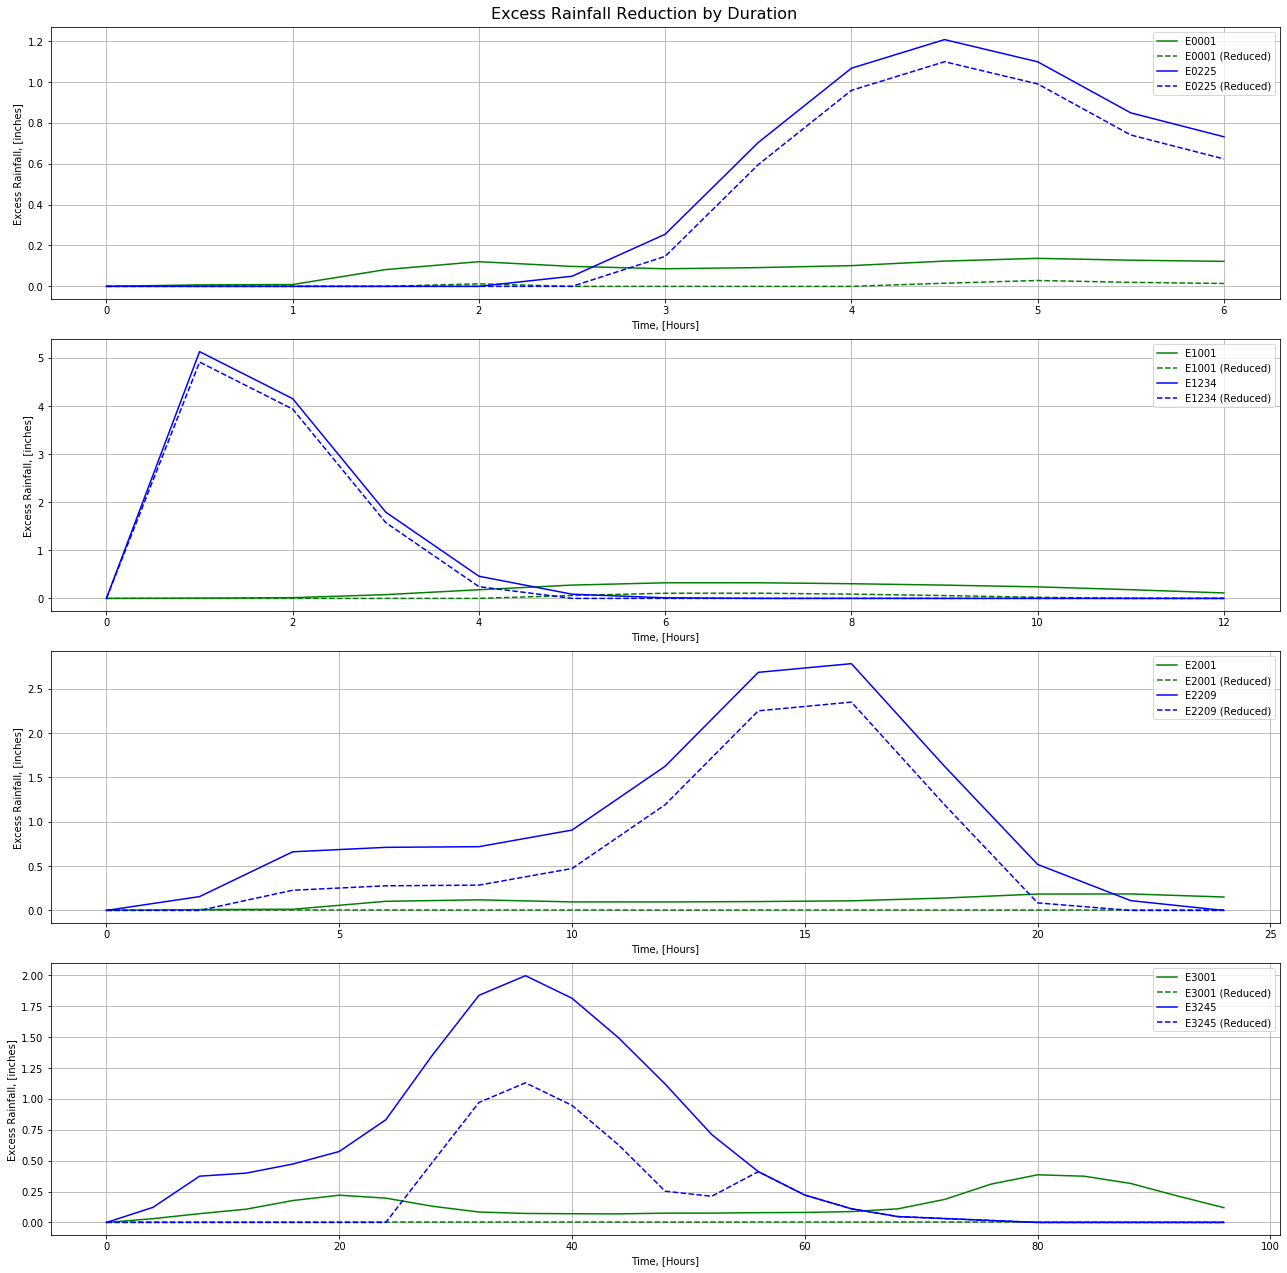

In [9]:
ReducedTable, StormwaterTable, SW_variables = hydromet_reduced.main(EventsTable, durations, BCN, rate = rate, maxcap = maxcap, 
                                                                    display_print = display_print, display_plots = display_plots)

---

## C. Calculate the Lateral Inflow Hydrographs:

Lateral Inflow Domains: ['L01', 'L02', 'L03', 'L04', 'L05', 'L06', 'L07', 'L08', 'L09', 'L10', 'L11', 'L12', 'L13', 'L14', 'L15', 'L16', 'L17', 'L18', 'L19', 'L20', 'L21', 'L22', 'L23', 'L24', 'L25', 'L26', 'L27', 'L28', 'L29', 'L30', 'L31', 'L32', 'L33', 'L34', 'L35', 'L36', 'L37', 'L38', 'L39', 'L40']


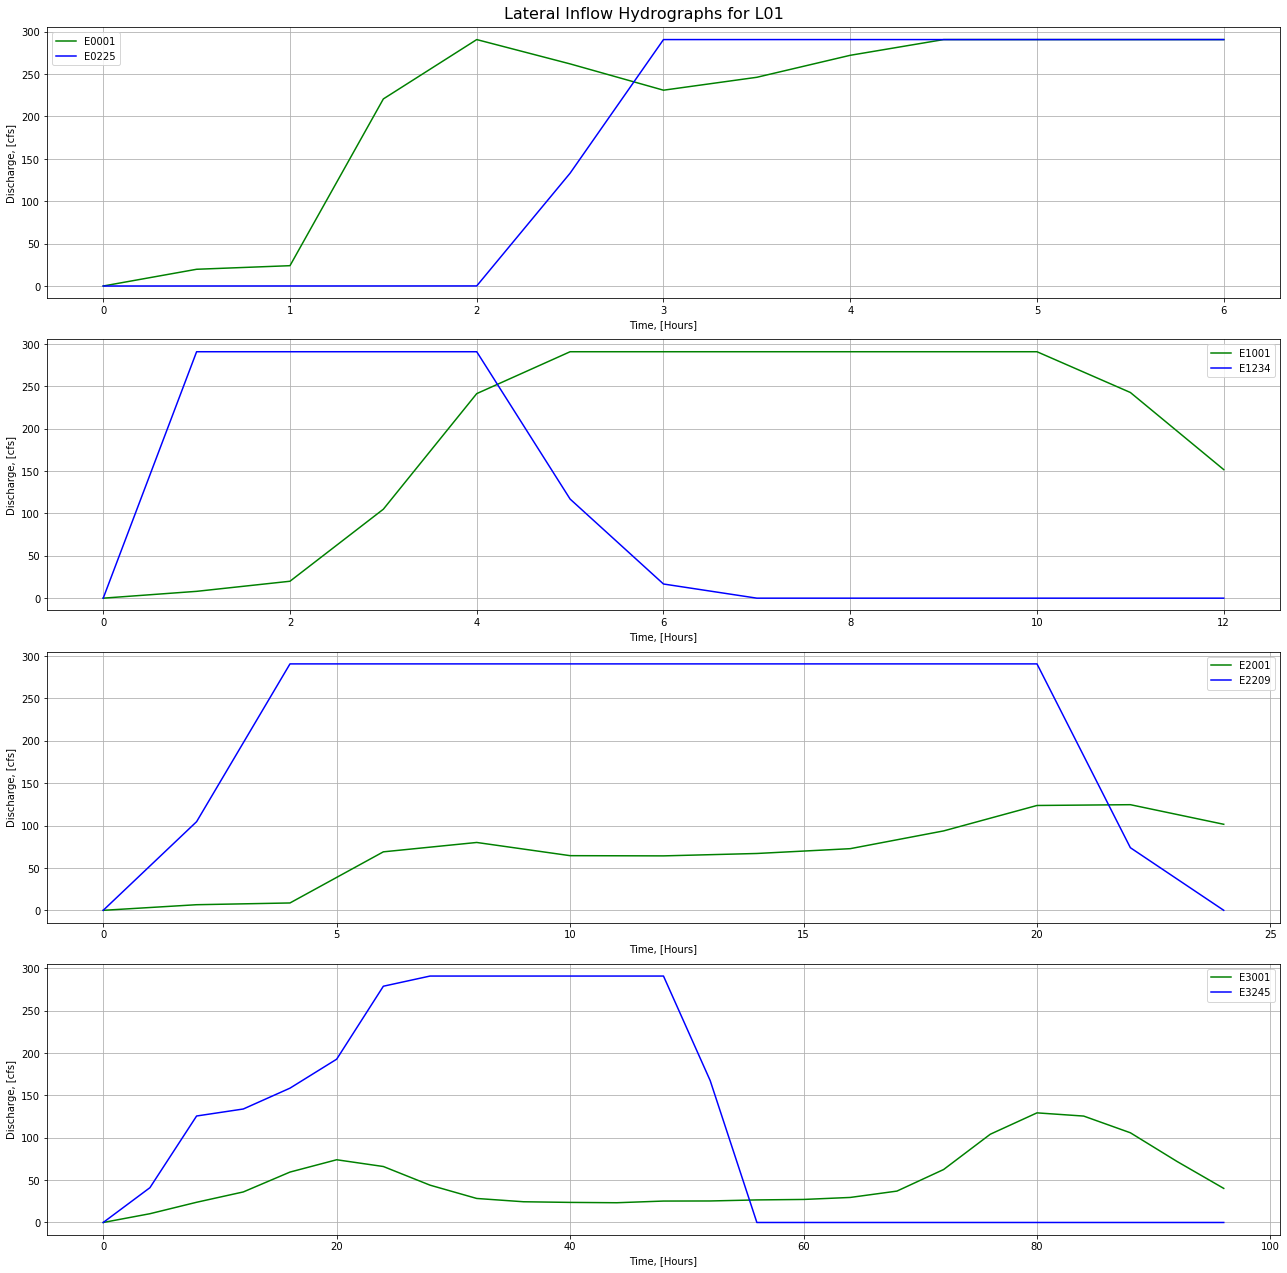

In [10]:
if lid.shape[0]>0:
    ReducedTable = calc_lateral_inflow_hydro(lid, ReducedTable, StormwaterTable, durations, BCN, display_print, display_plots, plot_lid_num = 0)

---

## D. Save the Results:

### Unreduced excess rainfall:

In [13]:
with open(outputs_dir/'{0}_Unreduced.json'.format(filestem), 'w') as f:
    json.dump(EventsTable, f)

### Reduced excess rainfall:

In [14]:
with open(outputs_dir/'{}.json'.format(filestem), 'w') as f:
    json.dump(ReducedTable, f)

### Metadata:

In [15]:
with open(outputs_dir/'{0}_SWMetadata.json'.format(filestem), 'w') as f:
    json.dump(SW_variables, f)

---

## END